In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
mta_data = pd.read_csv('/content/drive/MyDrive/Processing Big Data/MTA_Ridership.csv')

In [4]:
mta_data.columns

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')

In [5]:
print("These are the columns of the dataset: " + ", ".join(mta_data.columns.tolist()))

These are the columns of the dataset: Date, Subways: Total Estimated Ridership, Subways: % of Comparable Pre-Pandemic Day, Buses: Total Estimated Ridership, Buses: % of Comparable Pre-Pandemic Day, LIRR: Total Estimated Ridership, LIRR: % of Comparable Pre-Pandemic Day, Metro-North: Total Estimated Ridership, Metro-North: % of Comparable Pre-Pandemic Day, Access-A-Ride: Total Scheduled Trips, Access-A-Ride: % of Comparable Pre-Pandemic Day, Bridges and Tunnels: Total Traffic, Bridges and Tunnels: % of Comparable Pre-Pandemic Day, Staten Island Railway: Total Estimated Ridership, Staten Island Railway: % of Comparable Pre-Pandemic Day


In [6]:
mta_data.tail()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
1335,10/27/2023,3853036,0.67,1341222,0.59,229895.0,0.73,203068,0.70,31164,1.05,1027312,1.11,6705.0,0.38
1336,10/28/2023,2742638,0.82,870471,0.63,124172.0,1.09,139276,0.91,20126,1.14,1019478,1.08,2994.0,0.66
1337,10/29/2023,1833986,0.75,587152,0.59,86843.0,0.95,80705,0.77,18145,0.99,871500,1.03,1766.0,0.47
1338,10/30/2023,3622512,0.63,1288650,0.57,225140.0,0.72,197551,0.68,29075,0.98,893690,0.96,7286.0,0.41
1339,10/31/2023,4006047,0.70,1188427,0.53,224816.0,0.72,203952,0.70,30712,1.03,873724,0.94,7784.0,0.44


In [7]:
mta_data.shape

(1340, 15)

In [8]:
mta_data = mta_data.iloc[:, :5]
mta_data.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99
1,03/02/2020,5329915,0.96,2209066,0.99
2,03/03/2020,5481103,0.98,2228608,0.99
3,03/04/2020,5498809,0.99,2177165,0.97
4,03/05/2020,5496453,0.99,2244515,1.00


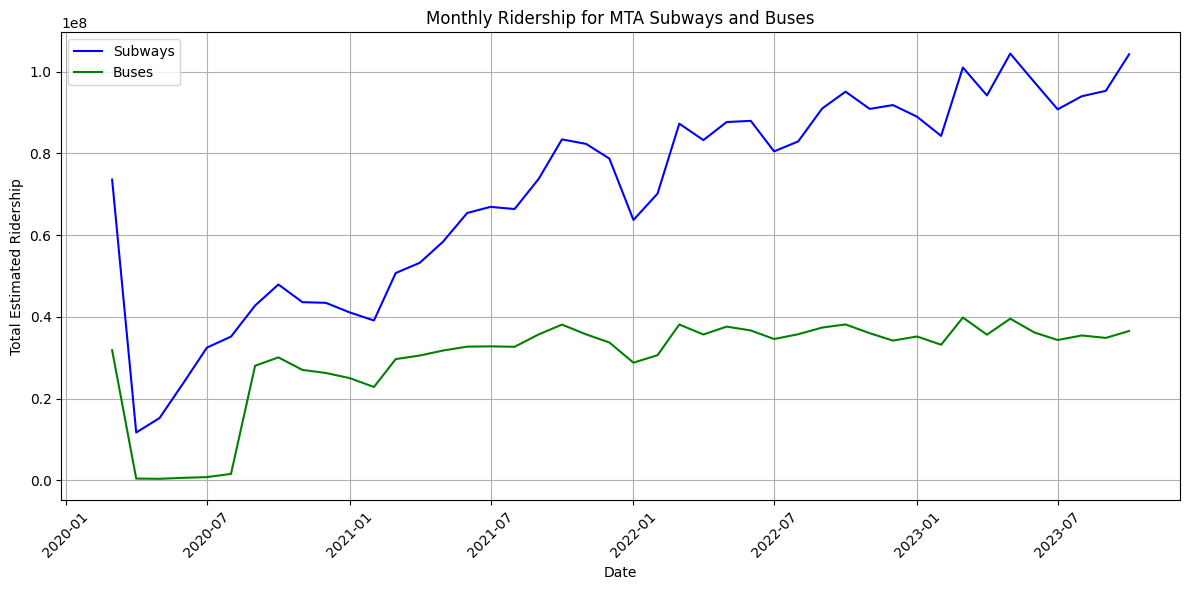

In [9]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
mta_data['Date'] = pd.to_datetime(mta_data['Date'])

# Group by month and sum the total ridership for Subways and Buses
monthly_ridership = mta_data.groupby(mta_data['Date'].dt.to_period('M')).agg({
    'Subways: Total Estimated Ridership': 'sum',
    'Buses: Total Estimated Ridership': 'sum'
}).reset_index()

# Convert the 'Date' from period to datetime for plotting
monthly_ridership['Date'] = monthly_ridership['Date'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_ridership['Date'], monthly_ridership['Subways: Total Estimated Ridership'], label='Subways', color='blue')
plt.plot(monthly_ridership['Date'], monthly_ridership['Buses: Total Estimated Ridership'], label='Buses', color='green')
plt.title('Monthly Ridership for MTA Subways and Buses')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


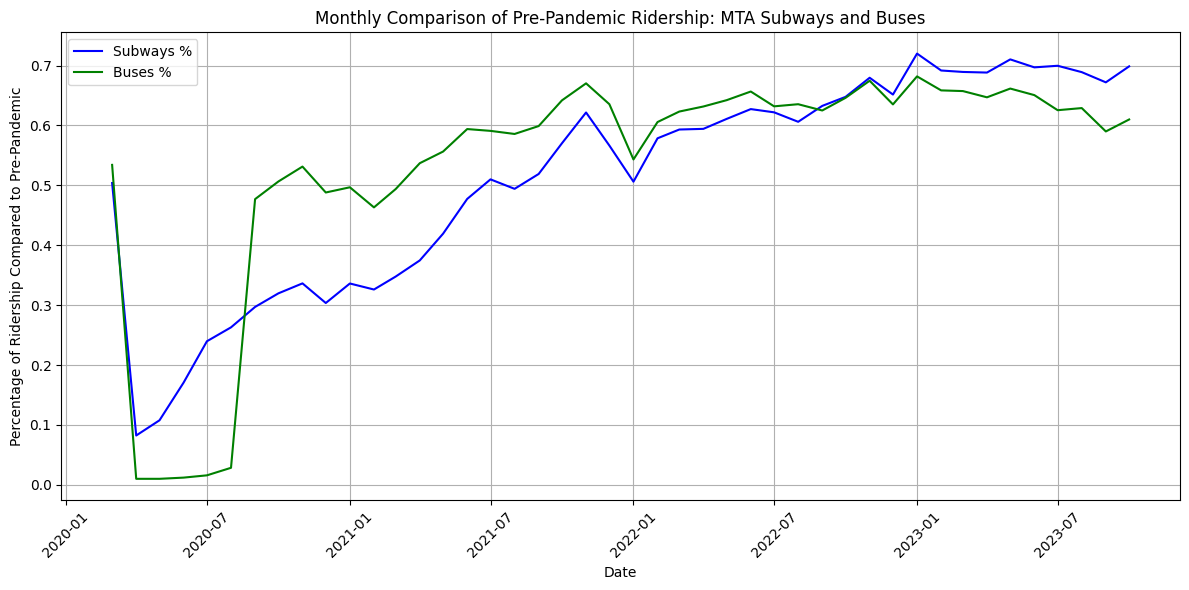

In [11]:
# Group by month and calculate the average percentage for Subways and Buses
monthly_percentage = mta_data.groupby(mta_data['Date'].dt.to_period('M')).agg({
    'Subways: % of Comparable Pre-Pandemic Day': 'mean',
    'Buses: % of Comparable Pre-Pandemic Day': 'mean'
}).reset_index()

# Convert the 'Date' from period to datetime for plotting
monthly_percentage['Date'] = monthly_percentage['Date'].dt.to_timestamp()

# Plotting the average percentages
plt.figure(figsize=(12, 6))
plt.plot(monthly_percentage['Date'], monthly_percentage['Subways: % of Comparable Pre-Pandemic Day'], label='Subways %', color='blue')
plt.plot(monthly_percentage['Date'], monthly_percentage['Buses: % of Comparable Pre-Pandemic Day'], label='Buses %', color='green')

plt.title('Monthly Comparison of Pre-Pandemic Ridership: MTA Subways and Buses')
plt.xlabel('Date')
plt.ylabel('Percentage of Ridership Compared to Pre-Pandemic')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
fare_card_data = pd.read_csv('/content/drive/MyDrive/Processing Big Data/Fare_Card_History.csv')

In [ ]:
print("These are the columns of the dataset: " + ", ".join(fare_card_data.columns.tolist()))

These are the columns of the dataset: From Date, To Date, Remote Station ID, Station, Full Fare, Senior Citizen / Disabled, 7 Day ADA Farecard Access System Unlimited, 30 Day ADA Farecard Access System Unlimited, Joint Rail Road Ticket, 7 Day Unlimited, 30 Day Unlimited, 14 Day Reduced Fare Media Unlimited, 1 Day Unlimited, 14 Day Unlimited, 7 Day Express Bus Pass, Transit Check Metrocard, LIB Special Senior, Rail Road Unlimited No Trade, Transit Check Metrocard Annual Metrocard, Mail and Ride Easy Pay Express, Mail and Ride Unlimited, Path 2 Trip, Airtran Full Fare, Airtran 30 Day, Airtran 10 Trip, Airtran Monthly


In [ ]:
fare_card_data.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,08/06/2021,07/31/2021,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,...,539,162,0,717,0,0,0,327,0,0
1,08/06/2021,07/31/2021,R003,CYPRESS HILLS,1323,134,3,13,0,817,...,12,19,0,11,0,0,0,70,0,0
2,08/06/2021,07/31/2021,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,...,14,31,0,28,0,0,0,301,0,0
3,08/06/2021,07/31/2021,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,...,13,25,0,40,0,0,0,111,0,0
4,08/06/2021,07/31/2021,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,...,36,14,0,25,0,0,0,148,0,0


In [ ]:
fare_card_data['From Date'].min()

'01/01/2011'

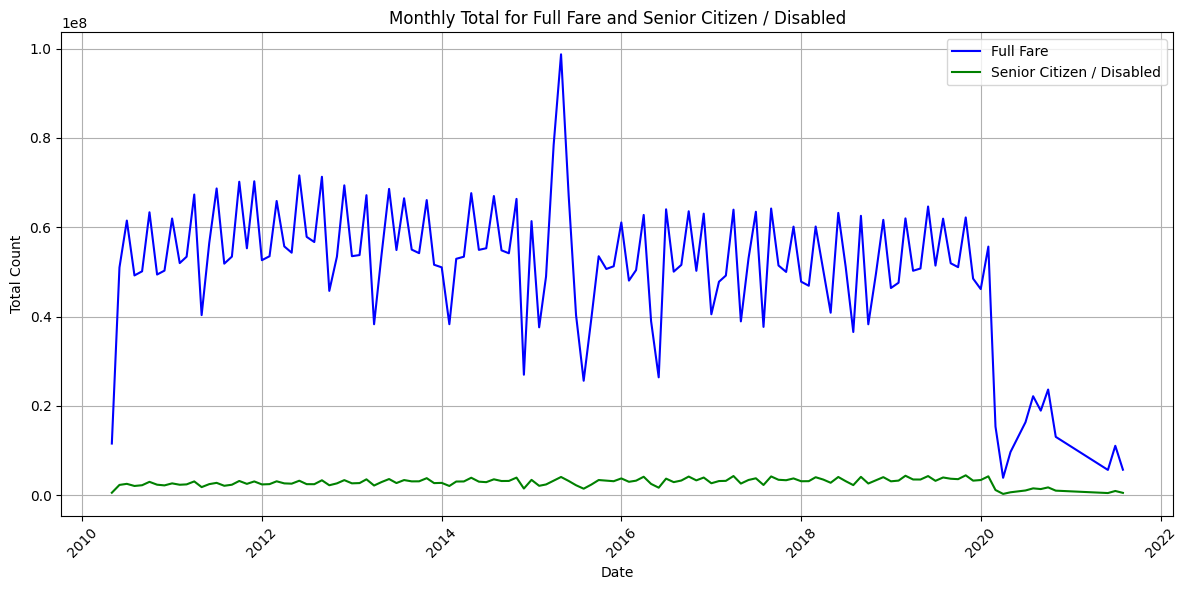

In [ ]:
# Group by month using 'From Date' and sum the total for "Full Fare" and "Senior Citizen / Disabled"
# We choose 'From Date' as the representative date for each record
monthly_fare_simplified = fare_card_data.groupby(fare_card_data['From Date'].dt.to_period('M')).agg({
    'Full Fare': 'sum',
    'Senior Citizen / Disabled': 'sum'
}).reset_index()

# Convert the 'Date' from period to datetime for plotting
monthly_fare_simplified['From Date'] = monthly_fare_simplified['From Date'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_fare_simplified['From Date'], monthly_fare_simplified['Full Fare'], label='Full Fare', color='blue')
plt.plot(monthly_fare_simplified['From Date'], monthly_fare_simplified['Senior Citizen / Disabled'], label='Senior Citizen / Disabled', color='green')
plt.title('Monthly Total for Full Fare and Senior Citizen / Disabled')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
